In [1]:
#basic
import pandas as pd
import numpy as np
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
# set seaborn style
sns.set_theme()
# make the plot bigger 
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 70 
#pd.set_option('display.max_rows', 250)

## Xử lý dữ liệu
Sử dụng dữ liệu thu thập được vào 23/04/2021

In [2]:
raw_data = pd.read_csv('23_04_2021.csv')

In [3]:
def dataframeCleaner(df):
    for columnname in df: #looping through titles of the table 
        temp = []     
        for column in df[columnname]:   #geting column elements for the each title
            column = str(column)
            column = column.replace(',','')# Removing unwanted data clutter
            column = column.replace('+','')#Removing unwanted '+'sign  
            try:   #using try except block to convert datatype string to integer while avoiding error
                column = int(column)
            except:
                pass
            
            temp.append(column)
        df[columnname] = temp
        
    df.replace('nan', 0, regex=True,inplace=True) # delete N/A
    df.replace(['\n'], '', regex=True, inplace=True) #delete unwanted newline
    df.replace([','], '', regex=True, inplace=True) #delete comma
    df.replace(r'^\s*$', 0, regex=True,inplace=True)# converting empty string to 0

    return df

In [4]:
def cleanerForNewCases(dataset):
    # remove unnecessary column
    df = dataset.drop(dataset.head(8).index)
    if set(['Active Cases/1M pop','New Deaths/1M pop','1 Testevery X ppl','1 Deathevery X ppl','1 Caseevery X ppl','Tests/\n1M pop','TotalTests','Deaths/1M pop','Tot Cases/1M pop','New Cases/1M pop']).issubset(df.columns):
        df.drop(['Active Cases/1M pop','New Deaths/1M pop','1 Testevery X ppl','1 Deathevery X ppl','1 Caseevery X ppl','Tests/\n1M pop','TotalTests','Deaths/1M pop','Tot Cases/1M pop','New Cases/1M pop'], inplace=True, axis=1)
    df.dropna(subset=['Continent'],how='any', inplace=True)
    # basic cleanner
    df = dataframeCleaner(df) 

    return df

## Pareto Chart

- Đây là chart được vẽ dựa trên nguyên tắc Pareto: đại đa số mọi thứ trong cuộc sống không được phân phối đều nhau. *Khoảng 80% kết quả là do 20% nguyên nhân gây ra.* Biểu đồ này bao gồm bar chart và line chart. Các cột trong chart được sắp xếp theo thứ tự từ cao đến thấp theo tần số, còn các giá trị tần suất tích lũy được biểu diễn bằng đường thẳng.

- Quan hệ biểu diễn: số ca mắc COVID-19 mới trong 1 ngày (23/04) theo lục địa & quốc gia.

- Lý do sử dụng: Biểu đồ xác định đâu là nơi có nhiều ca mắc mới bộc phát nhất. Mục đích là để tìm ra trong một nhóm nguyên nhân đâu là nguyên nhân quan trọng nhất (lục địa/ quốc gia).

In [5]:
def paretoChart(df,title):
    df = df.sort_values(['NewCases'],ascending=False) 
    # add cumulative frequency
    df["cumpercentage"] = df["NewCases"].cumsum()/df["NewCases"].sum()*100

    fig, ax = plt.subplots()
    ax.bar(df.index, df["NewCases"], color="C0")
    ax.set_ylabel('Cases')
    ax.set_title(title)

    ax2 = ax.twinx()
    ax2.plot(df.index, df["cumpercentage"], color="C1", marker="D", ms=7)
    ax2.yaxis.set_major_formatter(PercentFormatter())

    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")

    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    plt.show()

In [6]:
df = cleanerForNewCases(raw_data) #df.index = df['Country,Other']
df=df[['NewCases','Continent']]
df = df.groupby('Continent').NewCases.agg(NewCases='sum')
df = df.sort_values(['NewCases'],ascending=False) 

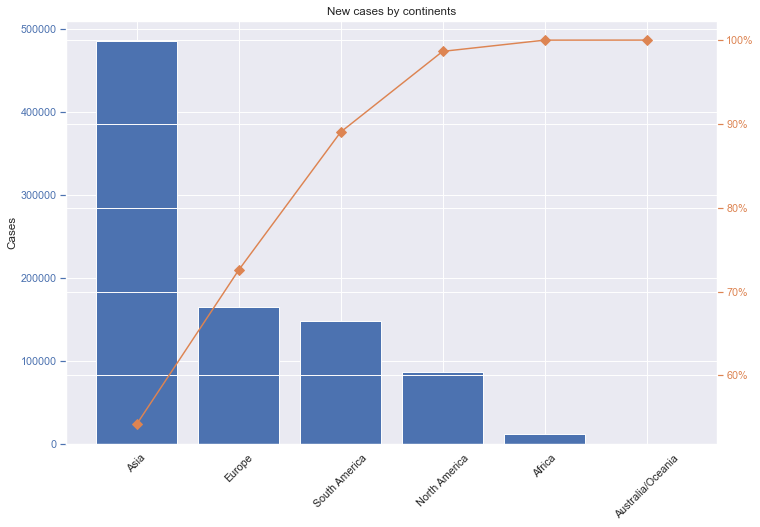

In [7]:
paretoChart(df,'New cases by continents')

Quan sát biểu đồ, cột trái có đơn vị là *tần số*, cột phải có đơn vị là *tần số tích lũy*, đường màu cam thể hiện giá trị tần số tích lũy:
- Chiều cao của cột thể hiện tần số (frequency) – đó là số lượng ca mắc mới trong mỗi nhóm châu lục. Ví dụ, có tổng cộng gần 25000 ca mắc mới ở Châu Âu. 
- Đường màu cam thể hiện tần số tích lũy (cumulative frequency) – số lượng ca mắc ở các quốc gia có số ca mắc nhỏ hơn và bao gồm số mốc đó. 

Dựa vào đường tần số tích lũy này, chiếu xuống trục hoành, ta thấy 80% ca mắc mới thuộc về hầu hết ở 3 châu lục chính: Châu Á, Châu Âu và Nam Mỹ. Điều này có thể chứng tỏ rằng dịch bệnh đang lan rộng ở Châu Á và Châu Âu. Đặc biệt là ở Châu Á, khi số ca mắc mới đạt gần 500,000 trong 1 ngày, cao gấp 2,5 lần so với Châu Âu và cách biệt hoàn toàn so với các châu lục khác.

Ngoài ra, lục địa Châu Úc/Châu Đại Dương không ghi nhận ca mắc mới nào. Đây là mặt tích cực của vấn đề.

Ta sẽ xem kĩ vào quan hệ với top 10 nước mắc ca nhiễm mới để biết nguyên nhân gây ra số ca nhiễm vượt trội tại Châu Á.

In [7]:
df = cleanerForNewCases(raw_data) 
df.index = df['Country,Other']
df = df[['NewCases']]
df = df.sort_values(['NewCases'],ascending=False) 
df = df.head(10)

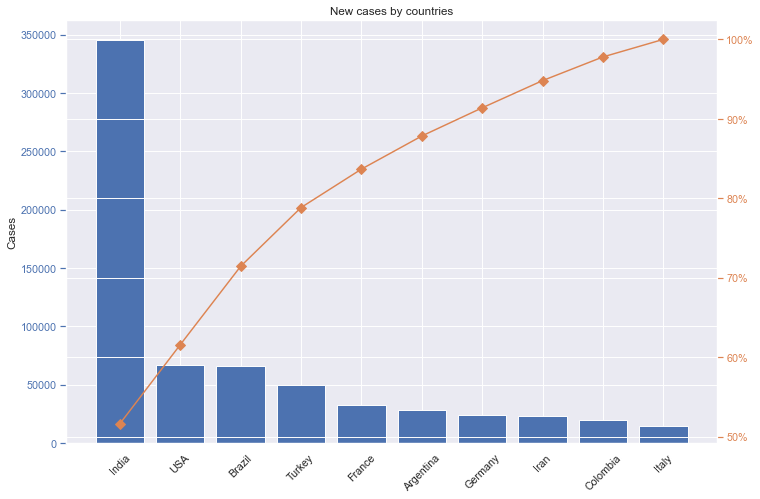

In [9]:
paretoChart(df,'New cases by countries')

Tập trung vào 80% ca mắc mới thì còn có 4 nước là Ấn Độ, USA, Brazil và Thổ Nhĩ Kỳ. 

Đáng chú ý là Ấn Độ, chiếm hơn 50% ca mắc mới trong tổng cộng 10 nước có số ca mắc mới nhiều nhất. Thực sự Ấn Độ đã vỡ trận phòng chống COVID-19. Tình hình lây nhiễm tại đây đã khiến cả thế giới sửng sốt. Ngày 23-4 là ngày đầu tiên Ấn Độ ghi nhận số ca nhiễm mới vượt 300.000 ca/ngày, sau chuỗi 8 ngày liên tiếp nước này có số ca nhiễm mới trên 200.000 ca/ngày. 

Đây là hậu quả của sự lơ là của người dân trong thực hiện các biện pháp phòng dịch sau khi làn sóng dịch thứ nhất lắng xuống. Người dân lại tụ tập đông trong các sự kiện lễ hội tôn giáo, vận động tranh cử.

Để xem dữ liệu dưới nhiều góc nhìn, ta tiếp tục sử dụng Area chart để xem sự thay đổi của số lượng ca mắc mới của các quốc gia trên.

## Area chart

- Đây là chart bao gồm một line chart và khu vực giữa line và trục được tô màu để đánh dấu nên có tên gọi là area chart. Thông thường, area chart sẽ được vẽ để xếp chồng lên nhau. Tuy nhiên, vì số lượng chart lớn (16 chart) nên sẽ sử dụng kĩ thuật *faceting*: chia nhỏ các biến dữ liệu trên nhiều ô con và kết hợp các ô con đó thành một hình duy nhất. Vì vậy, thay vì sử dụng thêm một biểu đồ bar, chúng ta có thể có quan sát được nhiều biểu đồ hơn, được sắp xếp cùng nhau trong một lưới.

- Quan hệ biểu diễn: sự thay đổi số ca mắc COVID-19 mới trong 3 ngày (từ 22/4 đến 22/4) của top 16 quốc gia có số lượng ca mắc mới lớn nhất trong ngày. 

- Lý do sử dụng: quan sát được các tổng số (totals) theo thời gian và tiện lợi để so sánh các quốc gia. Liên hệ với Pareto Chart đã vẽ.

In [28]:
raw_data_18 = pd.read_csv('_18_04_2021.csv')
raw_data_19 = pd.read_csv('_19_04_2021.csv')
raw_data_20 = pd.read_csv('_20_04_2021.csv')
raw_data_21 = pd.read_csv('_21_04_2021.csv')
raw_data_22 = pd.read_csv('22_04_2021.csv')
raw_data_23 = pd.read_csv('23_04_2021.csv')
raw_data_24 = pd.read_csv('24_04_2021.csv')
country = ["India","USA","Brazil","Turkey","France","Argentina","Germany","Iran","Colombia","Italy","Ukraine","Spain","Peru","Poland","Netherlands","Russia"]

In [29]:
def createDFArea(dataset,date):
    df = cleanerForNewCases(dataset) #df_22.index = df_22['Country,Other']
    is_country = df['Country,Other'].isin(country) 
    df = df[is_country]
    df = df[['Country,Other','NewCases']] 
    df = df.sort_values(['NewCases'],ascending=False)  
    df['Date'] = date
    return df

In [30]:
def areaChartFace(df,title):
    g = sns.FacetGrid(df, col='Country,Other', hue='Country,Other', col_wrap=4, )  # Create a grid : initialize it
    g = g.map(plt.plot, 'Date', 'NewCases')     # Add the line over the area with the plot function
    g = g.map(plt.fill_between, 'Date', 'NewCases', alpha=0.2).set_titles("{col_name} Country,Other")     # Fill the area with fill_between
    g = g.set_titles("{col_name}")     # Control the title of each facet
    plt.subplots_adjust(top=0.92)     # Add a title for the whole plot
    g = g.fig.suptitle(title);
    plt.show()

In [31]:
df_18 = createDFArea(raw_data_18,'18')
df_19 = createDFArea(raw_data_19,'19')
df_20 = createDFArea(raw_data_20,'20')
df_21 = createDFArea(raw_data_21,'21')
df_22 = createDFArea(raw_data_22,'22')
df_23 = createDFArea(raw_data_23,'23')
df_24 = createDFArea(raw_data_24,'24')
df = pd.concat([df_18,df_19,df_20,df_21,df_22,df_23,df_24])

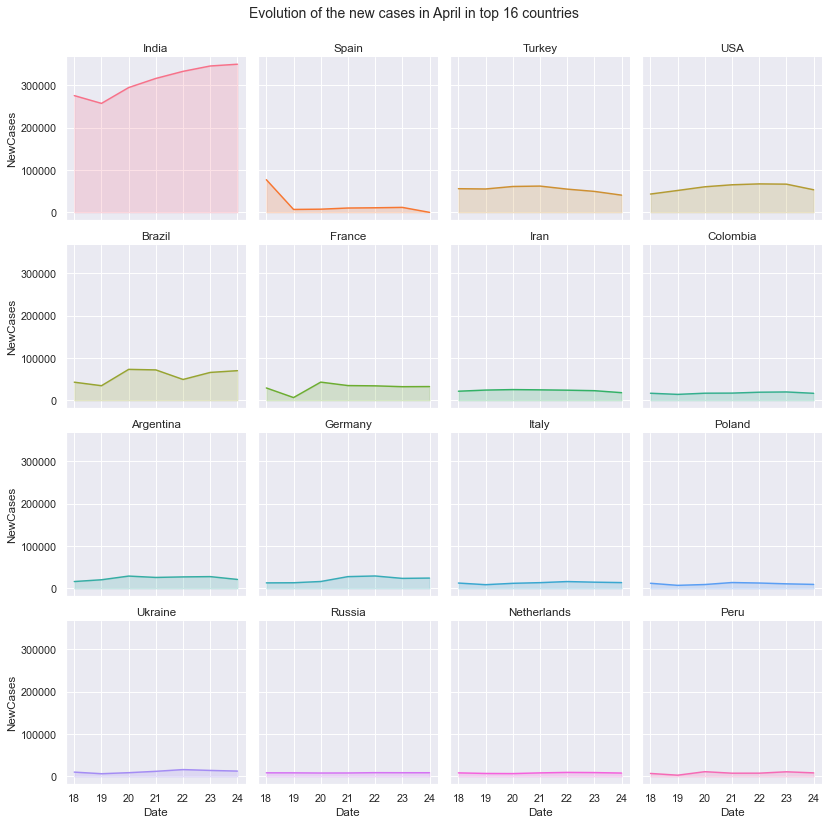

In [32]:
areaChartFace(df,'Evolution of the new cases in April in top 16 countries');

Ấn Độ độc chiếm tier 1, dẫn đầu về số ca mắc mới, gấp nhiều lần so với các nước trong tier 2 như Mỹ, Brazil, Thổ Nhĩ Kỳ, Tây Ban Nha. Đặc biệt từ ngày 19, số ca mắc có chiều hướng tăng mạnh theo từng ngày. Trong các ngày tới, Ấn Độ có thể sẽ cán mốc 400,000 ca. 

Các nước tier 3 như Ukraine, Ba Lan, Peru, Nga, ... thì có số ca mắc mới chỉ bằng gần một nữa các nước tier 2. 

Tạm loại bỏ Ấn Độ để xem sự thay đổi của các nước còn lại tốt hơn.

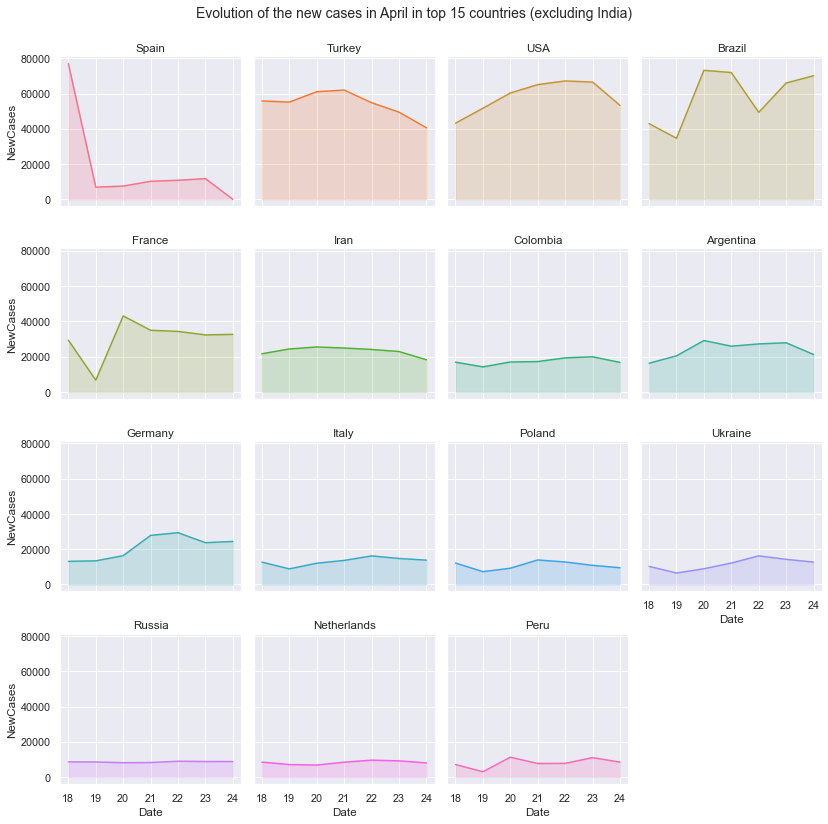

In [33]:
country.remove('India')
df_18 = createDFArea(raw_data_18,'18')
df_19 = createDFArea(raw_data_19,'19')
df_20 = createDFArea(raw_data_20,'20')
df_21 = createDFArea(raw_data_21,'21')
df_22 = createDFArea(raw_data_22,'22')
df_23 = createDFArea(raw_data_23,'23')
df_24 = createDFArea(raw_data_24,'24')
df = pd.concat([df_18,df_19,df_20,df_21,df_22,df_23,df_24])
areaChartFace(df,'Evolution of the new cases in April in top 15 countries (excluding India)');

Có thể thấy, số ca nhiễm mới ở Mỹ, Brazil và Thổ Nhĩ Kỳ có giá trị cao gấp 2,5 đến 3 lần so với các nước khác trong top. Song các nước đều có xu hướng giảm đều, chỉ có Brazil đang có chiều hướng số ca mắc mới trong ngày tăng trở lại. Pháp ghi nhận số ca mắc mới tăng đột biến trong ngày 19 nhưng cũng giảm dần ngay sau đó.

Đặc biệt, ở Tây Ban Nha có một sự giảm ca mới đáng kể trong ngày 19, từ gần 80,000 xuống chỉ còn dưới 20,000 ca. Các nước còn lại cũng ghi nhận số ca mắc mới có biên độ chênh lệch giữa các ngày không biến động nhiều.

## Lolipop chart

- Đây là một biến thể tiện dụng của bar chart; trong đó các bar được thay thế bằng một line và một dấu chấm ở cuối (trông như cây lolipop). Cũng giống như bar chart, lollipop chart được sử dụng để so sánh giữa các mục hoặc danh mục khác nhau. Chúng cũng được sử dụng để xếp hạng hoặc hiển thị xu hướng theo thời gian. 

- Quan hệ biểu diễn: Số ca nhiễm mới xuất hiện và số ca đã hồi phục trong ngày 23/04/2021 của từng quốc gia.

- Lý do sử dụng: giúp quan sát giá trị quan sát cạnh nhau trên cùng một dòng tốt hơn, bằng cách chỉ hiển thị sự khác biệt của chúng thay vì hiển thị các giá trị trên các dòng khác nhau.

In [42]:
def createDFLolipop(dataset):
    df = cleanerForNewCases(dataset)
    is_country = df['Country,Other'].isin(country) 
    df = df[is_country]
    df = df[['Country,Other','NewCases','NewRecovered']] 
    df = df.sort_values(['NewCases'],ascending=False)  
    return df

In [43]:
def lolipopChart(df,title):
    my_range=range(1,len(df.index)+1)
    # The horizontal plot is made using the hline function
    plt.hlines(y=my_range, xmin=df['NewCases'], xmax=df['NewRecovered'], color='grey', alpha=0.4)
    plt.scatter(df['NewCases'], my_range, color='red', alpha=1, label='New Cases')
    plt.scatter(df['NewRecovered'], my_range, color='green', alpha=0.4 , label='New Recovered')
    plt.legend()
    # Add title and axis names
    plt.yticks(my_range, df['Country,Other'])
    plt.title(title, loc='left')
    plt.xlabel('Cases')
    plt.ylabel('Country')
    # Show the graph
    plt.show()  

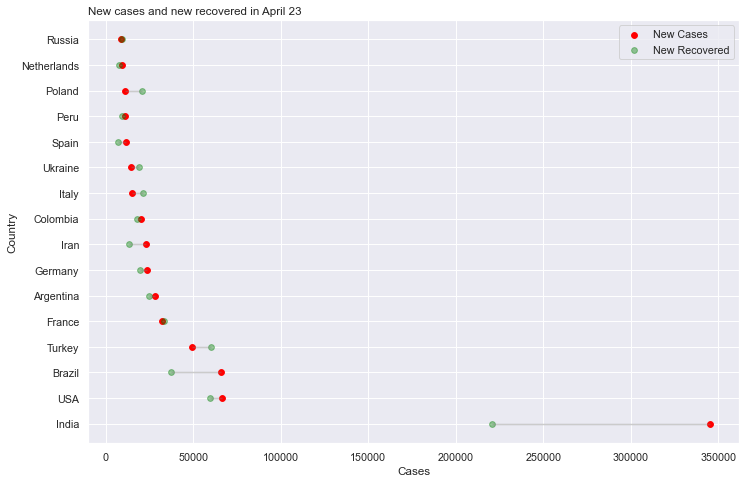

In [44]:
country = ["India","USA","Brazil","Turkey","France","Argentina","Germany","Iran","Colombia","Italy","Ukraine","Spain","Peru","Poland","Netherlands","Russia"]
df = createDFLolipop(raw_data_23) 
lolipopChart(df,'New cases and new recovered in April 23')

Có thể thấy, không chỉ đứng đầu về số ca mới bùng phát trong 1 ngày, Ấn Độ cũng dẫn đầu các nước khác về số ca hồi phục, điều này là hợp lí với tỉ lệ dân số. Tuy nhiên, nếu tập trung về khoảng cách, thì sự chênh lệch giữa ca nhiễm mới và ca hồi phục vẫn còn khá lớn, cho thấy tốc độ hồi phục vẫn còn rất chậm so với tốc độ lây nhiễm. Nếu không có biện pháp khắc phục, Ấn Độ có thể vỡ trận phòng chống COVID-19.

=> Do chênh lệch khá lớn. Ta có thể tạm loại bỏ Ấn Độ để xem sự thay đổi của các nước còn lại tốt hơn.

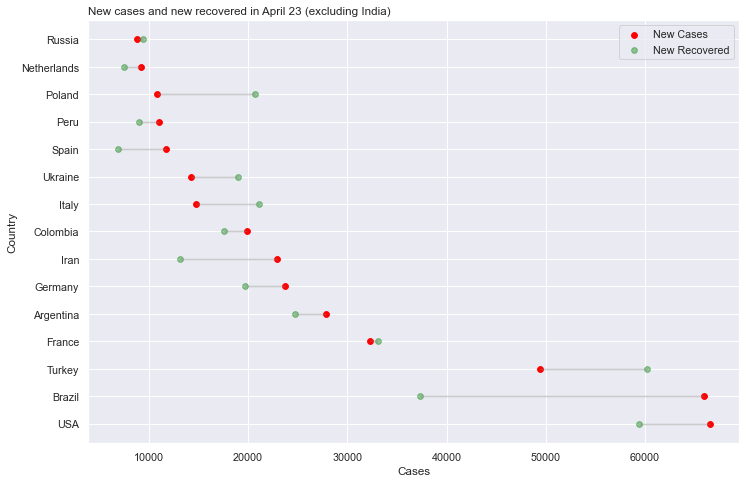

In [45]:
country.remove('India')
df = createDFLolipop(raw_data_23) 
lolipopChart(df,'New cases and new recovered in April 23 (excluding India)')

Như vậy, tuy đứng thứ 2 về lượt nhiễm mới, nhưng số ca hồi phục của Mỹ cũng có chiều hướng gần hơn với số ca lây nhiễm. 

Đặc biệt là Thổ Nhĩ Kỳ, tuy đứng thứ ba về số ca mắc mới, nhưng số ca hồi lại phục vượt đến hơn 10,000 ca so với ca mắc mới, đây là tín hiệu tốt. Tương tự với một số quốc gia khác như Ba Lan, Ukraine, Ý. 

Các quốc gia còn lại theo xu hướng chung là số ca mới sẽ nhiều hơn một phần so với số ca hồi phục. Đáng lưu ý là Brazil, khi chênh lệch giữa số ca mới và số ca hồi phục là khá lớn. Nếu không cẩn thận phòng chống, rất có thể sẽ kết cục như Ấn Độ.

## Tham khảo
https://stackoverflow.com/questions/53577630/how-to-make-pareto-chart-in-python

https://www.datafied.world/web-scraping-live-covid-19-data-and-its-analysis-190

https://www.python-graph-gallery.com/242-area-chart-and-faceting

https://www.python-graph-gallery.com/184-lollipop-plot-with-2-groups
